Colab🤩 -> https://drive.google.com/file/d/19teNLYeBK9pCXvG19-gct7TdJryV8feC/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
U_dc1, U_dc2, U_dc3, U_dc4, U_dc5, U_dc6, U_dc7 = 10, 12, 14, 16, 18, 20, 22
I_dc1, I_dc2, I_dc3, I_dc4, I_dc5, I_dc6, I_dc7 = 16, 23, 28, 32, 37, 42, 47

data_5_1 = {'U_ДС (В)': [U_dc1, U_dc2, U_dc3, U_dc4, U_dc5, U_dc6, U_dc7],
            'I_ДС (мА)': [I_dc1, I_dc2, I_dc3, I_dc4, I_dc5, I_dc6, I_dc7]}

df_5_1 = pd.DataFrame(data_5_1)

U_dl1, U_dl2, U_dl3, U_dl4, U_dl5, U_dl6, U_dl7 = 10, 12, 14, 16, 18, 20, 22
I_dl1, I_dl2, I_dl3, I_dl4, I_dl5, I_dl6, I_dl7 = 15, 23, 28, 32, 36, 41, 46

data_5_2 = {'U_ДL (В)': [U_dl1, U_dl2, U_dl3, U_dl4, U_dl5, U_dl6, U_dl7],
            'I_ДL (мА)': [I_dl1, I_dl2, I_dl3, I_dl4, I_dl5, I_dl6, I_dl7]}

df_5_2 = pd.DataFrame(data_5_2)

U_d1, U_d2, U_d3, U_d4, U_d5, U_d6, U_d7 = 10, 12, 14, 16, 18, 20, 22
I_d1, I_d2, I_d3, I_d4, I_d5, I_d6, I_d7 = 15, 23, 28, 32, 36, 41, 46

data_5_3 = {'U_d (В)': [U_d1, U_d2, U_d3, U_d4, U_d5, U_d6, U_d7],
            'I_d (мА)': [I_d1, I_d2, I_d3, I_d4, I_d5, I_d6, I_d7]}

df_5_3 = pd.DataFrame(data_5_3)


In [3]:
# U_dc1, U_dc2, U_dc3, U_dc4, U_dc5, U_dc6, U_dc7 = 10, 12, 14, 16, 18, 20, 22
# I_dc1, I_dc2, I_dc3, I_dc4, I_dc5, I_dc6, I_dc7 = 27, 37, 44, 50, 56, 61, 66

# data_5_1 = {
#     'U_dc (В)': [U_dc1, U_dc2, U_dc3, U_dc4, U_dc5, U_dc6, U_dc7],
#     'I_dc (мА)': [I_dc1, I_dc2, I_dc3, I_dc4, I_dc5, I_dc6, I_dc7]
# }
# df_5_1 = pd.DataFrame(data_5_1)

# U_dl1, U_dl2, U_dl3, U_dl4, U_dl5, U_dl6, U_dl7 = 10, 12, 14, 16, 18, 20, 22
# I_dl1, I_dl2, I_dl3, I_dl4, I_dl5, I_dl6, I_dl7 = 25, 33, 39, 43, 48, 53, 57

# data_5_2 = {
#     'U_dl (В)': [U_dl1, U_dl2, U_dl3, U_dl4, U_dl5, U_dl6, U_dl7],
#     'I_dl (мА)': [I_dl1, I_dl2, I_dl3, I_dl4, I_dl5, I_dl6, I_dl7]
# }
# df_5_2 = pd.DataFrame(data_5_2)

# U_d1, U_d2, U_d3, U_d4, U_d5, U_d6, U_d7 = 10, 12, 14, 16, 18, 20, 22
# I_d1, I_d2, I_d3, I_d4, I_d5, I_d6, I_d7 = 34, 44, 54, 60, 67, 72, 77

# data_5_3 = {
#     'U_d (В)': [U_d1, U_d2, U_d3, U_d4, U_d5, U_d6, U_d7],
#     'I_d (мА)': [I_d1, I_d2, I_d3, I_d4, I_d5, I_d6, I_d7]
# }
# df_5_3 = pd.DataFrame(data_5_3)


In [4]:
display(df_5_1.T)
display(df_5_2.T)
display(df_5_3.T)

,0,1,2,3,4,5,6
U_ДС (В),10,12,14,16,18,20,22
I_ДС (мА),16,23,28,32,37,42,47


,0,1,2,3,4,5,6
U_ДL (В),10,12,14,16,18,20,22
I_ДL (мА),15,23,28,32,36,41,46


,0,1,2,3,4,5,6
U_d (В),10,12,14,16,18,20,22
I_d (мА),15,23,28,32,36,41,46


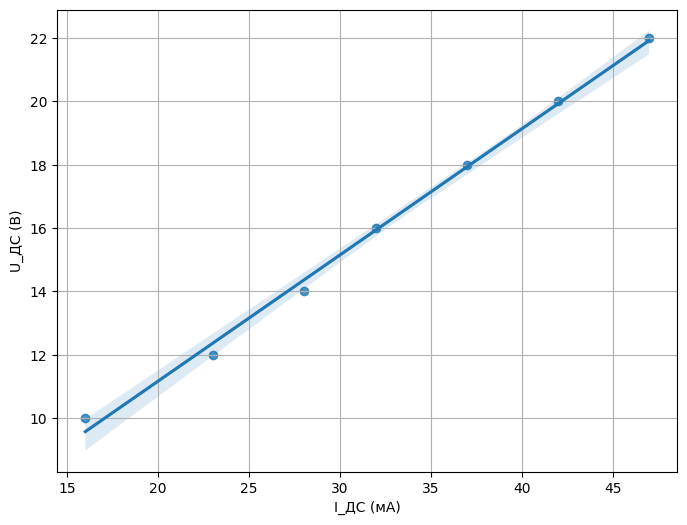

In [5]:
U_dc = [10, 12, 14, 16, 18, 20, 22]
I_dc = [16, 23, 28, 32, 37, 42, 47]

plt.figure(figsize=(8, 6))
sns.regplot(y=U_dc, x=I_dc, marker='o' )

plt.ylabel('U_ДС (В)')
plt.xlabel('I_ДС (мА)')
plt.grid(True)

plt.show()


In [6]:
from scipy.stats import linregress
_ = linregress(U_dc, I_dc)
X_c = _.slope
X_c

2.5

In [7]:
OMEGA = 2 * np.pi * 50
OMEGA = round(OMEGA)
OMEGA

314

In [8]:
C = 1/(OMEGA * X_c)
C = round(C,3)
C

0.001

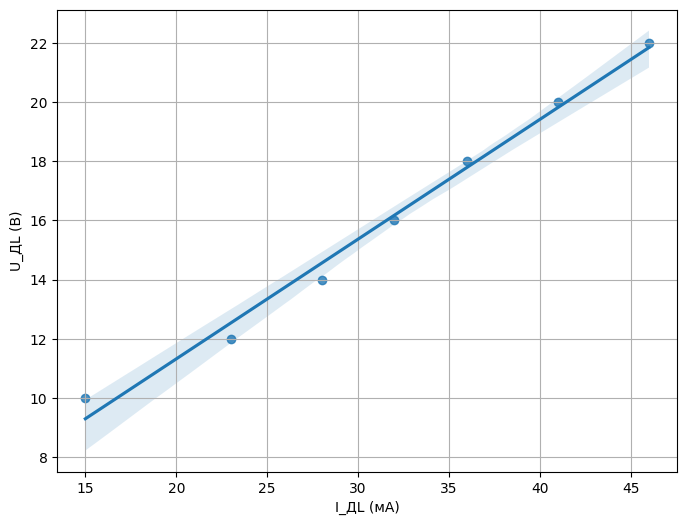

In [9]:
U_dl = [10, 12, 14, 16, 18, 20, 22]
I_dl = [15, 23, 28, 32, 36, 41, 46]

plt.figure(figsize=(8, 6))
sns.regplot(y=U_dl, x=I_dl, marker='o')

plt.ylabel('U_ДL (В)')
plt.xlabel('I_ДL (мА)')
plt.grid(True)

plt.show()

In [10]:
from scipy.stats import linregress
_ = linregress(U_dl, I_dl)
Z_L = _.slope
Z_L = round(Z_L,2)
Z_L

2.45

In [11]:
OMEGA

314

In [12]:
# А тут начинаются хиханьки да хаханьки. Дело в том, что tg, которым мы считаем, является ковариацией, то есть тенденцией изменения U и I. Если U = 1, то I = 2,45 ⇒ оно не может быть слишком большим, а значит, либо ошибка в формуле, либо...

R_l = 22
L = (1/OMEGA) * (Z_L ** 2 - R_l ** 2) ** (1/2)
L

C:\Users\replicaCortex\AppData\Local\Temp\ipykernel_1836\2911025274.py:4: RuntimeWarning: invalid value encountered in scalar power
  L = (1/OMEGA) * (Z_L ** 2 - R_l ** 2) ** (1/2)


nan

In [13]:
df_5_3["U_m"] = df_5_3["U_d (В)"].apply(lambda x: round((2 * x) ** (1/2)))
df_5_3["I_m"] = df_5_3["I_d (мА)"].apply(lambda x: round((2 * x) ** (1/2)))
df_5_3.T

,0,1,2,3,4,5,6
U_d (В),10,12,14,16,18,20,22
I_d (мА),15,23,28,32,36,41,46
U_m,4,5,5,6,6,6,7
I_m,5,7,7,8,8,9,10


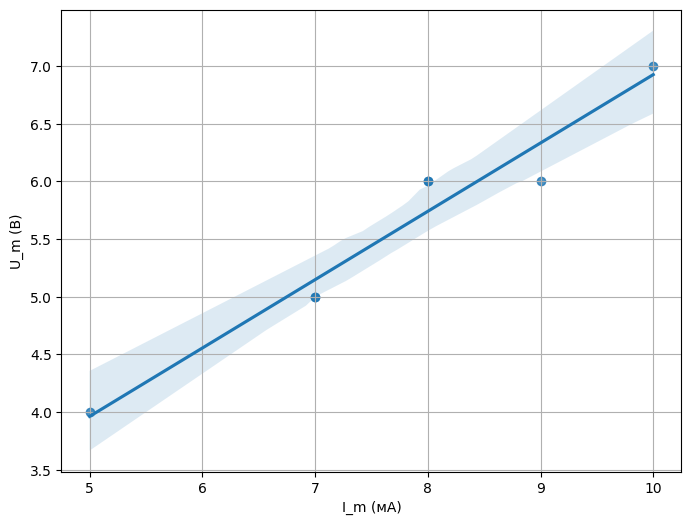

1.6

In [14]:
U_m = [4, 5, 5, 6, 6, 6, 7]
I_m = [5, 7, 7, 8, 8, 9, 10]

plt.figure(figsize=(8, 6))
sns.regplot(y=U_m, x=I_m, marker='o')

plt.ylabel('U_m (В)')
plt.xlabel('I_m (мА)')
plt.grid(True)

plt.show()

regression_result_m = linregress(U_m, I_m)
Z = regression_result_m.slope
display(round(Z,2))

In [15]:
R = 220
Z_alt = (1/2) ** (R**2 + (OMEGA * L - 1/(OMEGA * C)) ** 2)
Z_alt

nan

# Построение Векторной диаграммы
Теперь R = R_l

In [16]:
R = R_l

In [17]:
df = pd.DataFrame()
df["I_m"] = df_5_3["U_m"].apply(lambda x: x/Z)
df["U_L"] = df["I_m"].apply(lambda x: x * OMEGA * L)
df["U_c"] = df["I_m"].apply(lambda x: x / (OMEGA * C))
df["U_r"] = df["I_m"].apply(lambda x: x * R)

I_m = (round(df["I_m"].mean(),2))
U_L = (round(df["U_L"].mean(),2))
U_c = (round(df["U_c"].mean(),2))
U_r = (round(df["U_r"].mean(),2))

# display I_m, U_L, etc

display(I_m)
display(U_L)
display(U_c)
display(U_r)

3.48

nan

11.09

76.61

In [18]:
U_m = (1/2) ** (U_r ** 2 + (U_L - U_c) ** 2)
U_m

nan

In [19]:
tg_fi = ((OMEGA * L) / (OMEGA * C)) / R_l
tg_fi

nan